## Teoría de Errores

<center>$ f(x) = sin(x),$ centrado en $x=\dfrac{5\pi}{6} $<center>


Para cada uno de los ejercicios seleccionados realice un programa en Python empleando el Jupyter Notebook que:
    
Determine los polinomios de Taylor desde el grado cero (0) hasta el grado cinco (5).
    
Realice una gráfica comparativa con la evaluación de los polinomios solicitados en el numeral anterior y determine cuál es el error de truncamiento resultante en cada uno de los polinomios hallados. Haga una gráfica del comportamiento del error para cada polinomio.

Haga un análisis de resultados basándose en la teoría y en los resultados obtenidos. Debe incluir referencias a la bibliografía empleada usando las normas APA. Comentarios sin referencias no serán tenidos en cuenta.


In [1]:
import numpy as np
import math 
from matplotlib import pyplot as plt 
import sympy as sp
x = sp.symbols('x')

## Se define la variable y la función
x0 = 5*math.pi/6
h = 0.001
n = 6


In [2]:
f0 = math.sin(x0)
f1 = math.cos(x0)
f2 = -math.sin(x0)
f3 = -math.cos(x0)
f4 = math.sin(x0)
f5 = math.cos(x0)
f6 = -math.sin(x0)

La aproximación de la serie de Taylor con n =  0 es  0.49999999999999994 con un error de  -0.0008660254037844387
La aproximación de la serie de Taylor con n =  1 es  0.4991339745962155 con un error de  -2.4999999999999994e-07
La aproximación de la serie de Taylor con n =  2 es  0.4991337245962155 con un error de  1.4433756729740644e-10
La aproximación de la serie de Taylor con n =  3 es  0.49913372474055306 con un error de  2.0833333333333334e-14
La aproximación de la serie de Taylor con n =  4 es  0.4991337247405739 con un error de  -7.216878364870323e-18
La aproximación de la serie de Taylor con n =  5 es  0.4991337247405739 con un error de  -6.944444444444444e-22
La grafica del Error de truncamiento es la siguiente


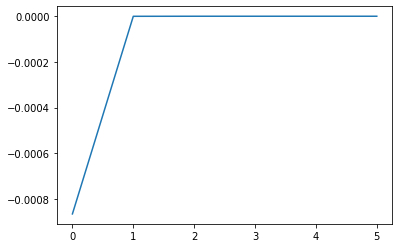

In [22]:
F = [f0, f1, f2, f3, f4, f5, f6]

termino_i = 0
Error_ = []

for i in range(n):
    a = np.math.factorial(i)
    b = np.math.factorial(i+1)
    termino_i = termino_i + F[i]*h**i/a
    Error = F[i+1]*h**(i+1)/b
    print("La aproximación de la serie de Taylor con n = ", i, "es ", termino_i, "con un error de ",Error )
    Error_.append(Error)

print("La grafica del Error de truncamiento es la siguiente")
plt.plot(Error_)

In [23]:
import numpy as np
import sympy as sym
import math

def politaylor(fx,x0,n):
    k = 0
    polinomio = 0
    while (k <= n):
        derivada   = fx.diff(x,k)
        derivadax0 = derivada.subs(x,x0)
        divisor   = np.math.factorial(k)
        terminok  = (derivadax0/divisor)*(x-x0)**k
        polinomio +=  terminok
        k += + 1
    return(polinomio)


x = sym.Symbol('x')
fx = sym.sin(x) 

x0 = 5*math.pi/6          
n  = 5  
a = x0 - 1   
b = x0 + 1
muestras = 100

px_tabla = []
for grado in range(0,n,1):
    polinomio = politaylor(fx,x0,grado)
    px_tabla.append(polinomio)

# SALIDA
print('grado :  polinomio')
for grado in range(0,n,1):
    px = px_tabla[grado]
    print(str(grado)+ ' : '+str(px))

grado :  polinomio
0 : 0.500000000000000
1 : 2.76724920529277 - 0.866025403784439*x
2 : -0.866025403784439*x - 1.71347298630024*(0.381971863420549*x - 1)**2 + 2.76724920529277
3 : -0.866025403784439*x + 2.58991351098656*(0.381971863420549*x - 1)**3 - 1.71347298630024*(0.381971863420549*x - 1)**2 + 2.76724920529277
4 : -0.866025403784439*x + 0.978663224926883*(0.381971863420549*x - 1)**4 + 2.58991351098656*(0.381971863420549*x - 1)**3 - 1.71347298630024*(0.381971863420549*x - 1)**2 + 2.76724920529277


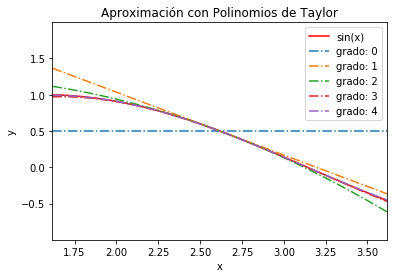

In [25]:
xi = np.linspace(a,b,muestras)
fxn = sym.utilities.lambdify(x,fx,'numpy')
fi = fxn(xi)

px_lineas = np.zeros(shape=(n,muestras), dtype =float)
for grado in range(0,n,1):
    polinomio = px_tabla[grado]
    px = sym.utilities.lambdify(x,polinomio,'numpy')
    px_lineas[grado] = px(xi)
    
import matplotlib.pyplot as plt
plt.plot(xi,fi,'r',label=str(fx))
for grado in range(0,n):
    etiqueta = 'grado: '+str(grado)
    plt.plot(xi, px_lineas[grado],
             '-.',label = etiqueta)

ymax = 2*np.max(fi)
plt.xlim([a,b])
plt.ylim([-ymax/2,ymax])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación con Polinomios de Taylor')
plt.legend()
plt.show()